In [1]:
import os
import pandas as pd
import glob
import re
from pprint import pprint

In [2]:
os.chdir('RetrievalEvaluation')

In [3]:
files = glob.glob('VIPM_evaluation - *.csv')
files

['VIPM_evaluation - RESNET.csv',
 'VIPM_evaluation - EFFICIENTNET.csv',
 'VIPM_evaluation - COLOR.csv',
 'VIPM_evaluation - SHAPE.csv']

In [4]:
# 1 == hit
# 0 == miss

In [5]:
def bpref(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / R
            for r in range(0,R) if hitmissorderedlist[r] == 1
        ]
    ) / R

    return ret

In [6]:
def bpref10(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / (10 + R)
            for r in range(0,R) if hitmissorderedlist[r] == 1
        ]
    ) / R

    return ret

In [7]:
def indAP(hitmissorderedlist):
    R = len(hitmissorderedlist)
    ret = sum(
        [
            1 - len(
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            ) / (r+1)
            for r in range(0,R) if hitmissorderedlist[r] == 1
        ]
    ) / R

    return ret

In [8]:
def test(hitmissorderedlist):
    print(hitmissorderedlist)
    R = len(hitmissorderedlist)
    ret = [
            
                [j for j in hitmissorderedlist[0:r]
                     if j == 0]
            
            for r in range(0,R) if hitmissorderedlist[r] == 1
        ]
    

    return ret

In [17]:
if False:
    csv_test = pd.read_csv(files[1], header=None)
    ol = csv_test.loc[5].values
    print(len(ol))
    ret = test(ol)
    print(len(ret))
    print(ret)
    print(indAP(ol))
    print(bpref(ol))
    print(bpref10(ol))

10
[1 0 0 1 0 1 0 1 1 1]
6
[[], [0, 0], [0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
0.3655555555555555
0.43
0.5149999999999999


In [19]:
if False:
    print((1 + 1-2/4 + 1-3/6+1-4/8+1-4/9+1-4/10)/10) #indap
    print((1 + 1-2/10 + 1-3/10+1-4/10+1-4/10+1-4/10)/10) #bpref
    print((1 + 1-2/20 + 1-3/20+1-4/20+1-4/20+1-4/20)/10) #bpref10

0.3655555555555555
0.4299999999999999
0.5149999999999999


In [20]:
perfs = {}
for f in files:
    print('reading file',f)
    mode = re.search('VIPM_evaluation - (.+)\.csv', f).group(1)
    print('mode',mode)
    csv = pd.read_csv(f, header=None)
    csv = csv.astype('int')
    _bpref = csv.apply(bpref, axis=1)
    _bpref10 = csv.apply(bpref10, axis=1)
    _indAP = csv.apply(indAP, axis=1)
    csv['bpref'] = _bpref
    csv['bpref10'] = _bpref10
    csv['indAP'] = _indAP
    perfs[mode] = csv

reading file VIPM_evaluation - RESNET.csv
mode RESNET
reading file VIPM_evaluation - EFFICIENTNET.csv
mode EFFICIENTNET
reading file VIPM_evaluation - COLOR.csv
mode COLOR
reading file VIPM_evaluation - SHAPE.csv
mode SHAPE


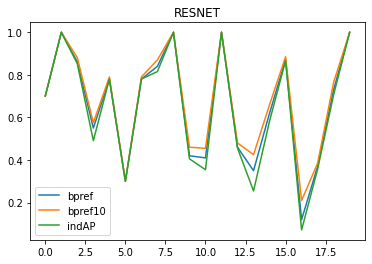

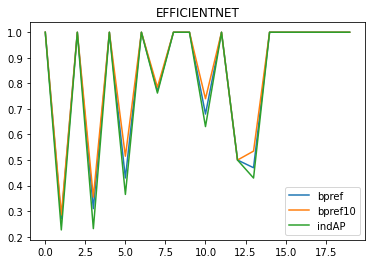

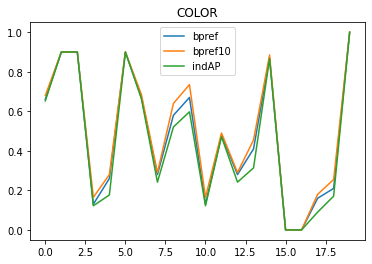

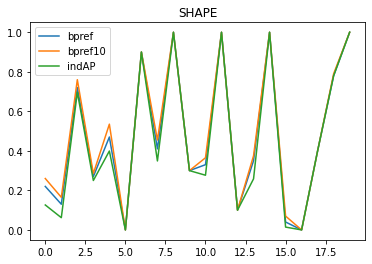

In [21]:
for k,v in perfs.items():
    v.plot(y=['bpref','bpref10','indAP'], title=k)

In [22]:
mAP = {k:v[['bpref','bpref10','indAP']].mean().to_dict() for k,v in perfs.items()}
mAP

{'RESNET': {'bpref': 0.658, 'bpref10': 0.6815, 'indAP': 0.6386765873015874},
 'EFFICIENTNET': {'bpref': 0.8215,
  'bpref10': 0.83575,
  'indAP': 0.8073253968253968},
 'COLOR': {'bpref': 0.47450000000000003,
  'bpref10': 0.4947500000000001,
  'indAP': 0.4475813492063493},
 'SHAPE': {'bpref': 0.471, 'bpref10': 0.488, 'indAP': 0.44557738095238103}}

In [23]:
mAPdf = pd.DataFrame(mAP).transpose()
mAPdf

,bpref,bpref10,indAP
RESNET,0.6580,0.68150,0.638677
EFFICIENTNET,0.8215,0.83575,0.807325
COLOR,0.4745,0.49475,0.447581
SHAPE,0.4710,0.48800,0.445577


<AxesSubplot:title={'center':'mAP'}>

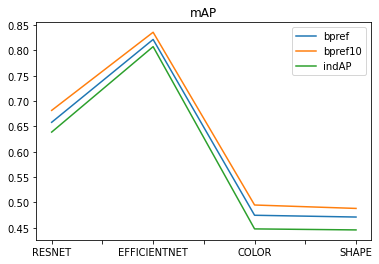

In [24]:
mAPdf.plot(title='mAP')

In [25]:
mAPdf.to_csv('mAP.csv')

In [6]:
#mAPdf = pd.read_csv('RetrievalEvaluation/mAP.csv', index_col=0)

In [27]:
mAPdf.columns = [f'm_{n}' for n in mAPdf.columns]

In [28]:
mAPdf.round(4)

,m_bpref,m_bpref10,m_indAP
RESNET,0.6580,0.6815,0.6387
EFFICIENTNET,0.8215,0.8358,0.8073
COLOR,0.4745,0.4948,0.4476
SHAPE,0.4710,0.4880,0.4456
